#**Regression**
As we may remember, there are two major machine learning techniques under the supervised ML category: **regression** and **classification**. Both use 'labeled' data to build a model for prediction (usually). If the prediction is a real valued number, it falls under the category of *regression*. If the prediction is a categorical or discrete values, it's called *classification*. And to add some confusion, *logistic* regression is a type of *classification*.

#**Linear Regression**

Linear regression is one of those words (like calculus or linear algebra) where we have probably have heard of it before (perhaps in a high school algebra class, or a college statistics class), but may not *know* (or forgotten) what it does or how it works.

Recently, it seems to have made a comeback and the fields of data science and machine learning are trying to claim 'ownership' of it. Linear regression is a technique that goes back to the early 1800's and is strongly rooted in the field of statistics.

#**Linear vs Polynomial Fitting**
This lesson's focus is on regression, but specifically linear regression. Linear regression uses the equation of a line as its 'model'. Here a straight line is used to represent the data (the best it can).

![](https://drive.google.com/uc?export=view&id=1jVlCo94YUV1rQooo_VTV6yfaKiaIqdk7)

If the line needs to become a curve, it becomes *polynomial* regression. We will look at this later in the lesson.

#**Single vs Multiple Independent Variables**

When there is only one independent variable involved (also called the predictor, explanatory), it's called *simple* linear regression or *univariate* linear regression. If more than one independent variable is involved, it called *multiple (or multivariate)* linear regression. If regression is used without any qualifiers, it's usually simple, linear regression.

In all possible configurations, mastering the simple linear regression model makes understanding all the others fall into place -- much of the techniques stay the same, just in 'higher' dimensions.

#**A Simple Goal**
The goal of linear regression is to find the best fitting line for a set of points/objects in a dataset. Once you have this line, it can be used to make predictions (assuming the line does a good job of modeling the data).

![](https://drive.google.com/uc?export=view&id=1fvWUvDW1QhyttAvVVMmqnFY8x7KKq8gN)


#**A Line, revisited**
As we saw in a previous lesson, a line is defined by its slope and y intercept. The equation of line $y = mx + b$ is the heart of linear regression.

If you think of this equation as a function, it could be written as
```
def f(x):
  return m * x + b
```

* $y$ is the output of the function (the dependent, response, outcome variable)
* $x$ is the input to the function (the independent, predictor, explanatory variable) 
* $m$ represents the slope
* $b$ represents the $y$ intercept (the value when $x$ is zero)

Note that this equation, $y = mx+b$ is sometime referred to as *polynomial* equation of degree 1 (i.e. first degree polynomial). If you had an equation that looked like $y = ax^2 + bx + c$, you would call it a quadratic equation. To solve this, you set $y$ to $0$ and use the quadratic equation to find the values of $x$. But we digress.

There are different algorithms for linear regression (the focus of this lesson), but essentially, each is trying to determine or find a line's slope $(m)$ and its y-intercept $(b\ or\ y0)$.

#**A dataset of 2 Points**

![](https://drive.google.com/uc?export=view&id=1jb_PkAhoL1Mw2T5lz94x6YGJoeM5Ng3n)

The simplest line (as shown above), can be derived by 2 points. The resulting line 'perfectly fits' the data (the 2 points). Each point is on the calculated line; the distance from the line to each point is zero. If the dataset has a small number of samples, we need to use additional metrics if we want to make any claims with statistical confidence.

#**A dataset of 3 Points (or more)**

When you add additional points to the data, calculating the slope and y-intercept is no longer trivial. You can pick any two points from the dataset to create a line; however, there will be no line that passes through all the other points (unless they are all one the line -- that is, they are some linear combination of the two selected points).

The goal of linear regression is to find the best *fitting line*. We define 'best fitting' as the line that minimizes the sum of the squared distances between the y values in the dataset (the actual values) and the y values calculated from the fitted line ŷ (y-hat).


![](https://drive.google.com/uc?export=view&id=1WzaI6D1LpqarHqZCFdyr_gtXWS0jqsrO)

#**The Objective Function**
The sum of squared distances is called the sum of squared errors (SSE) or **residuals**. So the goal of linear regression is to minimize the following function (be sure to understand this, before moving on) for the n data observations:


<div align="center"> $SSE = \sum_{i=1}^n (y_i - \hat{y_i})^2$ </div>


How do we do that? That is how can one select the line (defined by its slope and y-intercept) such that the SSE is minimized?

Well, that **is** the field of linear regression. This lesson will look at different techniques to fit a line to a dataset that minimized the SSE and some ways to apply regression to a dataset. In math, statistics, and machine learning, they use different techniques to take the data and 'figure out' which line best models the data.

Once we find the line that minimizes SSE, we can then calculate other statistics to help us understand the correlation (if any) between the data attributes (i.e. "is there a linear relationship between x and y?").

#**A page out of Stats 101 (literally)**

![](https://drive.google.com/uc?export=view&id=1BHCtqiIpk_CpYe058k09wqJFz-3d8Ag-)


#**A Statistician's View of Linear Regression**
The above image is taken from page 450 from Learning From Data ($2^{nd}$ edition). But any statistics book on linear regression will have the formulas necessary to find the slope and y- intercept of the regression line (the one that minimizes SSE).

In this example, we are going to use the same dataset the book uses and go over the formulas (the dataset comes from a fictitious sociologist investigating the relationship between the number of years mothers attend college and the number of years their daughters attend college).

![](https://drive.google.com/uc?export=view&id=15fJ0UbVmeoL74MmA80sCsXlgzgFFRPK1)

Let's load up the data. The following function uses pandas to load the dataset, but then returns two parallel numpy arrays, one for the x (the independent variable) attribute and one for the y (the dependent variable) attribute.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def xy_from_file(p, x, y, show=False):
    df = pd.read_csv(p)
    if show:
        df['XY'] = df[x] * df[y]
        print(df.head())
    x_values = df[x].values
    y_values = df[y].values
    return x_values, y_values
xv, yv = xy_from_file(('data20-1.csv'), 'Mother', 'Daughter', show=True)

   ID  Mother  Daughter  XY
0   1       0         0   0
1   2       0         1   0
2   3       1         2   2
3   4       2         3   6
4   5       2         4   8


#**All those ∑'s**

Looking at Table 20-1, we now need to calculate the various summation quantities $(e.g. \sum x, \sum y, \sum x^2, \sum y^2, etc)$. These will be used for determining the slope and y-intercept of a line. Luckily we can use numpy to make this very straightforward:

In [39]:
def find_line(x,y):
  
    x_sum  = np.sum(x)              # ∑x
    y_sum  = np.sum(y)              # ∑y
    xy_sum = np.sum(x * y)          # ∑(xy)

    x2_sum = np.sum(np.square(x))   # ∑(x2) 
    y2_sum = np.sum(np.square(y))   # ∑(y2)
    
    x_ave  = np.mean(x)
    y_ave  = np.mean(y)
    n = np.size(x)

    dx = (n * xy_sum - x_sum * y_sum)
    dy = (n * x2_sum - x_sum * x_sum)
    
    slope = dx/dy
    y0 = y_ave - slope * x_ave  # y0 is the same as b
    
    print("y = {:.3f}x + {:.3f}".format(slope, y0))


#**Ready for plugin**

![](https://drive.google.com/uc?export=view&id=1NiSSHm8YAUMsoEZAXJ7IhatP57bhhetJ)

The above image gives all the necessary formulas for calculating the slope and y-intercept with the above calculations.
Add the following code to find_line.

```
n = np.size(x)
dx = (n * xy_sum - x_sum * y_sum)
dy = (n * x2_sum - x_sum * x_sum)

slope = dx/dy
y0 = y_ave - slope * x_ave  # y0 is the same as b

print("y = {:.3f}x + {:.3f}".format(slope, y0))
```

The following should now work:

```
xv, yv = xy_from_file(('data20-1.csv'), 'Mother', 'Daughter')
find_line(xv, yv)
```

In [40]:
xv, yv = xy_from_file(('data20-1.csv'), 'Mother', 'Daughter')
find_line(xv, yv)

#You should see y = 1.500x + 0.500. Which confirms the example.

y = 1.500x + 0.500


#**Measuring the Strength of the the Linear Relationship**

Given any dataset, we can always fit a line to it. And by definition it will be the best fitting line. But the question of how well the dependent variable's variation is explained by the dependent variable needs to be addressed.

The following image depicts some of the important calculations we can make to help answer that question:

![](https://drive.google.com/uc?export=view&id=1NpWZi0JWAma__5dl35s-swgXmYMmXiCL)

###**SST, SSE, MSE**

SST is the total variation between the average y (dependent variable) and each point. It is the sum of the squared differences. Using NumPy it is simply:

```
SST = np.sum(np.square(y - y_ave))
```

SSE is the sum of the squared residuals. It is what the least squares method is minimizing. The **M**ean **S**quared **E**rrors is a scaled version of the SSE. It is the SSE divided by the number of observations. It will be a useful measurement in an upcoming lesson.

###**R and R$^2$**

As we saw, regression finds the best-fitting straight line; *correlation* is used to describe the strength of the relationship. The Pearson correlation coefficient, R, helps determine if two variables are strongly related. It basically measures how much of the variability of the dependent variable is explained by the independent variable. The Pearson correlation statistic measures this strength. It's range is -1 to +1. Values close to 0 imply the variables are unrelated.

![](https://drive.google.com/uc?export=view&id=1kJTsM8rwjdmgjquT-847sG_JWEk0u4j2)

$R^2$ is of course related to R but is easier to interpret. It is calculated via

<div align="center"> $R^2 = \frac{Var(mean) - Var(line)}{Var(mean)}$ </div>


Var(mean)
* variance around the mean (looking at the y values)
* sum of the squared differences from the mean (between the actual y and the mean) 
* SST (or SSM == SST/n)

Var(line)
* variance around the actual and predicted values
* sum of the squared difference between actual value and predicted value 
* SSE (or MSE == SSE/n)

So based on our previous discussion, $R^2$ can also be defined as

<div align="center"> $R^2 = \frac{SST - SSE}{SST}$ </div>


<br>

####**R$^2$ as a Percentage**

The $R^2$ range is [0, 1] and can be thought of as a percentage: it is the percentage of variation explained by the relationship between the two variables.

####**20-1 example:**

For the 20-1 data, $R^2$ is 0.94. The daughter/mother relationship accounts for 94% of the variation in the data.

#**The p-value**

![](https://drive.google.com/uc?export=view&id=1QasN_SXK4L84fbWXW51_XW4cCZQLenc6)

From statistics, the p-value is the probability that random chance generated the data under investigation. It can be used to determine if $R^2$ is statistically significant or not. A low p-value, tells you if the $R^2$ value is due to chance (or something equal or rarer).

Although we won't calculate it, several of the libraries we will use, do give you a p-value as well.



#**Exercise**
#**(part of the Lesson requirements)**
**LinearRegressionOLS**

Create a class named LinearRegressionOLS whose constructor takes an x and y array of values. It calculates (using only numpy) and saves the following as instance attributes (attribute name in parenthesis):

* the x values (x)
* the y values (y)
* the slope (slope)
* the y intercept (y0)
* the SSE (SSE)
* r2, the correlation coefficient squared (r2)

**Easy printing**

Implement the method so that printing a LinearRegressionOLS instance will be similar to find_line.

Most of the work has been done for you. It's now a matter of encapsulating all the information in a Python class.

In [45]:
class LinearRegressionOLS(object):
  def __init__(self, xv, yv):
    self.x = xv
    self.y = yv
    self.x_sum  = np.sum(self.x)
    self.y_sum  = np.sum(self.y)             
    self.xy_sum = np.sum(self.x * self.y)         
    self.x2_sum = np.sum(np.square(self.x))
    self.y2_sum = np.sum(np.square(self.y))  
    self.x_ave  = np.mean(self.x)
    self.y_ave  = np.mean(self.y)
    self.n = np.size(self.x)
    self.dx = (self.n * self.xy_sum - self.x_sum * self.y_sum)
    self.dy = (self.n * self.x2_sum - self.x_sum * self.x_sum)
    self.slope = self.dx/self.dy
    self.y0 = self.y_ave - self.slope * self.x_ave
    self.SSE = np.sum(np.square(self.y - (self.slope*self.x + self.y0)))
    self.SST = np.sum(np.square(self.y - self.y_ave))

  def __repr__(self):
    return "y = {:.3f}x + {:.3f}".format(self.slope, self.y0)

  def predict(self, x_value):
    return self.slope*x_value + self.y0
  def display(self, equal_aspect=False):
    fig, axes = plt.subplots(1,1)
    # plot the points
    axes.scatter(self.x, self.y, s=75, color='gray')
    # plot the fitted line
    x1 = np.min(self.x)
    y1 = self.predict(x1)
    x2 = np.max(self.x) + 0.25
    y2 = self.predict(x2)
    axes.plot([x1, x2], [y1,y2], color='blue')
    if equal_aspect:
      # make the axis' look nice
      max_v = np.max(np.maximum(self.x, self.y)) + 0.25
      axes.set_ylim(0, max_v)
      axes.set_xlim(0, max_v)
      axes.set_aspect('equal')
      return fig


Once done the following should work:

```
# same data from Table 20-1
xv, yv = xy_from_file(('data20-1.csv'), 'Mother', 'Daughter')
stats_line = LinearRegressionOLS(xv, yv)
print(stats_line, "({:.3f})".format(stats_line.SSE))

# data from Table 20-2; different dataset (same book, p.458)
xv, yv = xy_from_file(('data20-2.csv'), 'SUGAR', 'TIME')
stats_line = LinearRegressionOLS(xv, yv)
print(stats_line, "({:.3f})".format(stats_line.SSE))
```

The output should be:

```
y = 1.500x + 0.500 (1.000)
y = 2.906x + 7.312 (376.500)
```

In [42]:
# same data from Table 20-1
xv, yv = xy_from_file(('data20-1.csv'), 'Mother', 'Daughter')
stats_line = LinearRegressionOLS(xv, yv)
print(stats_line, "({:.3f})".format(stats_line.SSE))

# data from Table 20-2; different dataset (same book, p.458)
xv, yv = xy_from_file(('data20-2.csv'), 'SUGAR', 'TIME')
stats_line = LinearRegressionOLS(xv, yv)
print(stats_line, "({:.3f})".format(stats_line.SSE))

y = 1.500x + 0.500 (1.000)
y = 2.906x + 7.312 (376.500)


### **Prediction**

Of course we can use this model to make predictions as well -- that's one of the main reasons for using linear regression. Although the accuracy of the prediction is based on the quality of the data as well as the true correlation of the dependent variable (y) with the independent variable (x).

Add the following method (predict) to your LinearRegressionOLS class so one can use it to make predictions. Once it is done the following should work:

```
prediction = model.predict(x_value)
```

###**Drawing the line**

With the other methods in place, the next thing we want to do is draw the regression model. Add the following code to your class so we can display the data points and the fitted line:

```
def display(self, equal_aspect=False):

    fig, axes = plt.subplots(1,1)

    # plot the points
    axes.scatter(self.x, self.y, s=75, color='gray')

    # plot the fitted line
    x1 = np.min(self.x)
    y1 = self.predict(x1)
    x2 = np.max(self.x) + 0.25
    y2 = self.predict(x2)
    axes.plot([x1, x2], [y1,y2], color='blue')

    if equal_aspect:
        # make the axis' look nice
        max_v = np.max(np.maximum(self.x, self.y)) + 0.25
        axes.set_ylim(0, max_v)
        axes.set_xlim(0, max_v)
        axes.set_aspect('equal')
  
  return fig
```

Once this is done, you should have a nice looking graph that mimics the image taken from the textbook:

![](https://drive.google.com/uc?export=view&id=1qI1oMiqImhwd-9cD1w8x3EwmM3_dkZ6y)

y = 1.500x + 0.500


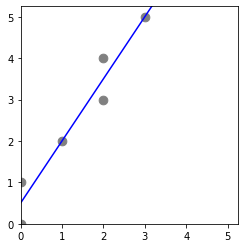

In [46]:
xv, yv = xy_from_file(('data20-1.csv'), 'Mother', 'Daughter')
stats_line = LinearRegressionOLS(xv, yv)
stats_line.display(True)
print(stats_line)

#**Finding the Line**
We now know that the goal of regression is to find the fitted line that minimizes the SSE (the objective function), but we haven't really explained how one goes from this formula:

<div align="center"> $SSE = \sum_{i=1}^n (y_i - \hat{y_i})^2$ </div>


to the calculations we used (from the textbook) to find the slope and y-intercept:

![](https://drive.google.com/uc?export=view&id=14BE2p_bEaAAHTs6OP1RF8t7OUhHgNDnA)


#**Enter stage right, calculus**

![](https://drive.google.com/uc?export=view&id=1KJUaO0SM3BS2dajMnUYM8p-2tQhOsDJh)

The answer to that important question lies on a path that goes through algebra and calculus.

The idea is that you take the derivative of the objective function, set it to zero and go through algebraic hoops to arrive at the solution.

The derivative of a function speaks to how the function changes with respect to a change in a variable or input. It measures the 'steepness' of the graph. Where the derivative is zero, is where the objective function (SSE) is at a minimum. The slope is zero -- it is not changing. Luckily we will not only skip the proof, but we will let you read it [here](https://storage.googleapis.com/uicourse/pdfs/RegressionProof.pdf) and [here](https://storage.googleapis.com/uicourse/dmap/SSE-derivations.pdf).

This is the essence of differential calculus. If you have a function, there's a set of rules you can use to find that function's derivative. Once you have the derivative, you can set it to zero (where its slope is at a minimum) and solve for the other parts of the equation. So at the end of the derivation, the SSE function is at a minimum when the slope and y-intercept are set to the following values:

* $y_0 = \bar y - m \bar x$
* $m = \frac{S_{xy}}{S_{xx}}$
* $S_{xy} = \sum(x_i - \bar x)(y_i - \bar y)$
* $S_{xx} = \sum(x_i - \bar x)^2$

#**A small crack to let the ML light in.**

The caveat to using calculus to minimize a cost function is that not all functions are differentiable. Also the above methods require you to accept using SSE as the cost function. This is where the machine learning people stepped in and said, Hey, we know how to deal with that situation(s). But we are getting ahead of ourselves.

#**Welcome, Linear Algebra**

###If you give a linear algebraist a set of equations, ...###

The method we just outlined is the method of ordinary least squares (OLS) and why it's part of the class name you created. As you may have noticed, for a large dataset , there are many 'passes' over the data to build all those summations. When someone who lives and breaths linear algebra and sees things like $\sum(xy)^2$, they immediately think of matrices to do that math.

We can, through more mathematical gymnastics, solve for SSE using linear algebra. This is, we can find where SSE is at minimum using matrices.

This is in fact, how most mathematical libraries implement regression. Perhaps you have heard of LAPACK and BLAS -- two very popular libraries for doing linear algebra (SciPy builds upon those libraries).

**Closed Form Solutions**

First we are going to present the 'closed form' solution. Then we will take it apart to understand how it works. It is considered a 'closed form' because there is an exact solution with a finite amount of data. To understand what is a closed form solution is, it might be best to look at something that is not:

 <div align="center"> $y = 4x + 6x^2 + \frac{22}{3}x^3 + \frac{95}{12}x^4 + ...$ </div>


That function is not in closed form because the summation never ends. However, the function $y = \frac{2+x^2}{1-x}e^x$ does provide the same answer to the problem but with a closed form
solution.

#**Linear Algebra**
The closed form solution to find both the slope and y intercept expressed using matrices is 

<div align="center"> $A = (X^TX)^{-1}X^TY$ </div>

X, A, Y are defined as follows:

<div align="center"> $X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \\ .. & .. \\1&x_n\end{bmatrix}$   $Y = \begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ ..  \\y_n\end{bmatrix}$  $A = \begin{bmatrix} b \\ m \end{bmatrix}$ </div>


The $^T$ is for *transform*, and the $^{−1}$ is for the matrix inverse (which we will go over).

**Welcome Back •**

Assuming we are a bit rusty on our linear algebra (and who isn't, really), let's go through it. The majority of operations are just two matrices multiplied together (i.e. the dot product). Below is a review of how dot product works with vectors and matrices:

![](https://drive.google.com/uc?export=view&id=1G9QuxJPaDxCtOUaJpdQOtgd0II3jMs4C)


The dot product is perfect for multiplying and summing up quantities.
<br>

### **$(X^T X)$**

The following shows the result of multiplying a matrix transform with itself:

![](https://drive.google.com/uc?export=view&id=12E1i0uCxLlQsWu_EU12-fRRmafsINt42)

The transform simply changes a column vector into a row vector (and vice versa). Note how the final answer contains some key summations (be sure to confirm the results with the OLS implementation).

In [47]:
xv, yv = xy_from_file(('data20-1.csv'), 'Mother', 'Daughter')

n = len(xv)
ones = np.ones(n)
X = np.column_stack( (ones, xv) )
print(X)
print(X.T)
XTX = X.T.dot(X)
print(XTX)

[[1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 2.]
 [1. 3.]]
[[1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 2. 2. 3.]]
[[ 6.  8.]
 [ 8. 18.]]


### **$(X^T X)^{-1}$**
**Taking the inverse of a matrix $(^{−1})$**

When you multiply a matrix by its inverse, you get the identity matrix (a matrix with all 0's except with 1's down the diagonal. A few algebraic steps were done to get to the following simplification of what $(X^T X)^{-1}$ becomes:

![](https://drive.google.com/uc?export=view&id=1t7WX3MdhPd_iftdMwWpmuCaIYLUBZG-L)

Also note that SSx is defined (as we saw earlier) as

![](https://drive.google.com/uc?export=view&id=1qqIrG6m5RgURI4mPmTu8PSYjHmFBDL9_)

In [50]:
XTX_I = np.linalg.inv(XTX)
print(XTX_I)

# show the identity matrix 
print(XTX_I.dot(XTX))

[[ 0.40909091 -0.18181818]
 [-0.18181818  0.13636364]]
[[1.00000000e+00 6.10622664e-16]
 [0.00000000e+00 1.00000000e+00]]


###**$(X^T X)^{-1}$**

The final part gives us the ∑y and ∑(xy):

![](https://drive.google.com/uc?export=view&id=1s6OCJ3dbgUoHkk1OLi5itEf4wTZvMEFw)

In [51]:
y = np.matrix(yv[:,]).T
print(y)
print(X.T.dot(y))

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
[[15.]
 [31.]]


###**All together now: $(X^TX)^{−1}X^TY$**

You can now put all the parts together and with using only linear algebra, you can solve for the best fitting line in one equation:

In [52]:
A = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(A)
y0    = A[0]
slope = A[1]

stats_line = LinearRegressionOLS(xv, yv)
print(np.isclose(stats_line.slope,slope))
print(np.isclose(stats_line.y0,y0))

[[0.5]
 [1.5]]
[[ True]]
[[ True]]


Be mindful that it's essentially the same formulas used in the OLS solution.

#**The DataScience Toolkit**

NumPy, SciPy and scikit-learn (and many others) provide linear regression solvers. Depending on the selected algorithm, you can find both OLS and matrix implementations. All three provide access to their source code and you can [dig](https://github.com/scipy/scipy/blob/v1.5.4/scipy/stats/_stats_mstats_common.py#L15-L144) into the [details](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq).

**NumPy**

Numpy's version is a bit tricky, since you need to get the data into matrix form:

In [53]:
def numpy_lr(x,y):
  import numpy as np
  A = np.vstack([x, np.ones(len(x))]).T

  # also scipy.linalg.lstsq
  p, res, rnk, s = np.linalg.lstsq(A, y, rcond=None)
  slope = p[0]
  y0    = p[1]
  
  result = "y = {:.3f}x + {:.3f}".format(slope, y0)
  print(result)
  
  r2 = 1 - res / np.sum((y - y.mean())**2)
  print('r^2', r2[0])

xv, yv = xy_from_file(('data20-1.csv'), 'Mother', 'Daughter')
numpy_lr(xv,yv)

y = 1.500x + 0.500
r^2 0.942857142857143


**SciPy**

Scipy's version is the most straightforward (it also provides a p-value):

In [54]:
def scipy_lr(x,y):

  from scipy import stats
  
  slope, y0, r_value, p_value, std_err = stats.linregress(x, y)
  
  result = "y = {:.3f}x + {:.3f}".format(slope, y0)
  print(result)
  print('r^2', r_value**2)

xv, yv = xy_from_file(('data20-1.csv'), 'Mother', 'Daughter')
scipy_lr(xv,yv)

y = 1.500x + 0.500
r^2 0.9428571428571431


**Sklearn**

Sklearn's linear regression uses the familiar fit method.

In [55]:
def sklearn_lr(x,y):

  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import r2_score
  
  lr = LinearRegression().fit(x.reshape(-1, 1), y)
  slope = lr.coef_[0]
  y0    = lr.intercept_
  
  result = "y = {:.3f}x + {:.3f}".format(slope, y0)
  print(result)
  
  y_fit = xv * slope + y0
  print('r^2', r2_score(yv, y_fit))

xv, yv = xy_from_file(('data20-1.csv'), 'Mother', 'Daughter')
sklearn_lr(xv,yv)

y = 1.500x + 0.500
r^2 0.9428571428571428


#**Extensions to linear regression**
**More Variables**

Once you have a good handle on using linear regression to solve univariate problems, the extension (multi-variate regression) is simply adding more independent variables. The matrix math generalizes nicely.

**Higher Order**

You can also try to fit a curve to your dataset and move away from linear regression into polynomial regression. Usually one visualizes the data (or is getting poor results from linear regression) before deciding to fit a higher order polynomial to the dataset. You also risk overfitting the data as well when you add higher degree polynomials.

![](https://drive.google.com/uc?export=view&id=1ucUzZo6FgTBEvu1f4bQbcVZvnPexaEu8)



**Logistic Regression**

Rather than predicting a continuous value, logistic regression is used when you want to predict if something is either True or False. It fits an 'S-curve' to the data rather than a straight line. We will see it at a later lesson.

![](https://drive.google.com/uc?export=view&id=1Fqu_NmR_iKo5XNgLNcQgdDuNnUlKtr_m)




#**Welcome Machine Learning**

As you add more independent variables, both OLS and the matrix versions can spin out of control. OLS becomes a mess; the summations for working with just two independent variables already becomes a task of managing a lot of summations.

The linear algebra solution does generalize nicely for adding additional attributes; however, finding the inverse of a matrix is computationally expensive, uses a lot of memory, and is only guaranteed to work under certain conditions.

The fundamental approach to solving linear regression is to produce an answer using all the data -- all at once. There's another approach: iterative. That is, we solve linear regression by looking at each data point, one at a time. The process of doing this is called gradient descent.

At its core, linear regression is parameter estimation. It attempts to estimate a slope and a y- intercept. However, the estimation, under certain conditions, is perfect. The method of gradient descent is ML's tour de force for parameter estimation.

#**Gradient Descent (GD)**

Gradient descent is NOT specific to linear regression, it can be used anytime you need to do parameter estimation. Gradient descent is a core algorithm used in many optimization problems found in statistics, machine learning and data science. It's also the main work- horse behind powering neural networks (updating the weights in back propagation).

We will have a separate lesson on gradient descent (GD). But we will push the re- formulation of linear regression into the world of GD before we go.

Let's start with the equation of a line:

* $y = mx+b$

Now change it into a function: 
* $f(x) = mx + b$

Replace the slope and y intercept with generic w$_i$eights 
* $f(x) = w_0 + w_1x$

Similarly, we can change the objective function MSE (SSE/n) from this 
* $MSE = \frac{1}{n}\sum(y_i-(f(x_i)))^2$

into this: 

* $MSE = \frac{1}{2n}\sum(y_i-(w_0 + w_1x_i))^2$


We use 1⁄2 of MSE -- to make the math easier (spoiler alert). This is essentially the cost function we will minimize in the next lesson.

It is common convention to use a J (for Jacobian) to denote the cost function.
* $J(w_0,w_1) = \frac{1}{2n}\sum(y_i-(w_0 + w_1x_i))^2$ 

Some may use the word *loss* function to discuss a single training example and use *cost* function to measure with respect to the entire training set. The words however, are used (a lot) interchangeably.


#**Lesson Assignment**
#**Part 1: Finish LinearRegressionOLS**
Make sure your LinearRegressionOLS class is working as outlined. It will be tested against the Table 20-2 dataset which measures sugar consumption (independent variable) and activity scores (dependent variable).
#**Part 2: Gradient Descent Preparation**
You will create a class named LinearRegressionGD whose constructor takes an x and y numpy array (named xv and yv).

You will also create a method named plot_mse that plots the MSE (mean squared error) for various values for either the slope or y-intercept of a line. The method signature is discussed below.

For example the graph below shows various values used for y0 and the resulting MSE value (for the 20-2 dataset):

![](https://drive.google.com/uc?export=view&id=1-NtW4kZ2IeLjvyz_M5ndAGraRKJs_Qmz)

Each point on the graph is the result of creating a line with the given y-intercept and then calculating the MSE for that particular line.

For this lesson, use the following definition of MSE:

<div align = "center"> $MSE = \frac{1}{n}\sum(y_i-(w_0 + w_1x_i))^2$ </div>




**plot_mse**

Create a method named plot_mse which will plot MSE on the y-axis and either slope or the y-intercept on x-axis.
* plot_mse has 3 parameters: v_values, slope=None, y0=None
* v_values is the vector of either slopes or y0's to plot
* it creates a figure (i.e. fig, axes = plt.subplots(figsize=(6,6)) for plotting 
* return the figure

In [94]:
import matplotlib.pyplot as plt

class LinearRegressionGD(object):
  def __init__(self, xv, yv):
    self.x = xv
    self.y = yv
    self.n = np.size(xv)

  def plot_mse(self, v_values, slope = None, y0 = None):
    MSE_list = []
    fig, axes = plt.subplots(figsize=(6,6))
    if (slope is None and y0 is not None):
      plot_slope = v_values
      for i in plot_slope:
        value = np.sum(np.square(self.y - (i*self.x + y0)))/self.n
        MSE_list.append(value)
        axes.set_xlabel('slope')
    elif (slope is not None and y0 is None):
      plot_y0 = v_values
      for i in plot_y0:
        value = np.sum(np.square(self.y - (slope*self.x + i)))/self.n
        MSE_list.append(value)
        axes.set_xlabel('y0')
    MSE = np.array(MSE_list)
    # plot the points
    axes.scatter(v_values, MSE, s=75, color='blue')
    axes.set_ylabel('MSE')
    return fig
    


Be sure to label your graphs properly. Use the variables plot_y0 and plot_slope to help navigate the input vector (v_values).

```
plot_y0    = y0 is None and slope is not None
plot_slope = slope is None and y0 is not None
assert plot_y0 or plot_slope, 'bad call'
```

#**Testing**
Be sure to test your function locally using the two provided datasets. For example, if you did the following:

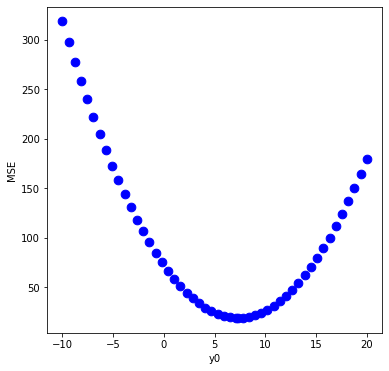

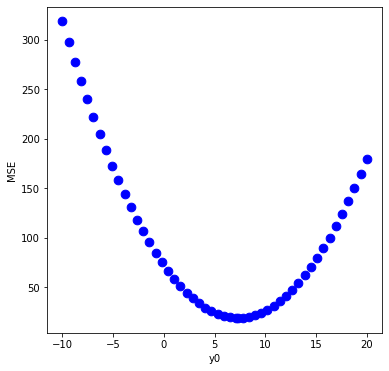

In [95]:
# load up the dataset
xv, yv = xy_from_file(('data20-2.csv'), 'SUGAR', 'TIME')
lr_gd = LinearRegressionGD(xv,yv)

# from our linear regression analysis, we know
# y = 2.90625x + 7.31250

# generate different values for y0
y0_v = np.linspace(-10,20,50)
# add in the known 'best' y0
y0_v = np.sort(np.append(y0_v, 7.31250))

# plot different y0's against MSE
# note the named parameter slope (whose default value is None)
lr_gd.plot_mse(y0_v, slope=2.90625)

You would get the following graph:

![](https://drive.google.com/uc?export=view&id=1oEz9YA45A2yhZvcNrepvtVJ8D2Z3jZHY)

Don't confuse quadratic as degree 4, In Latin, the word "quadrus" means a square (because it has four sides) and "quadratus" means "squared."

![](https://drive.google.com/uc?export=view&id=1VsEvWdrL_qs191RfnrBt3J1tduUkgv7f)


Quadratus is the Latin for "square" due to there being four sides on a square. The second power of a number is called its square because if we have an integer, and construct a square with that number of items on each side, the total number will be its second power. For example, a 4×4 square having 16 items:
```
* * * *
* * * *
* * * *
* * * *
```
Sources http://mathforum.org/library/drmath/view/52572.html

**Steps to submit your work:**


1.   Download the lesson notebook from Moodle.
2.   Upload any supporting files using file upload option within Google Colab.
3.   Complete the exercises and/or assignments
4.   Download as .ipynb
5.   Name the file as "lastname_firstname_WeekNumber.ipynb"
6.   After following the above steps, submit the final file in Moodle





<h1><center>The End!</center></h1>